# Homework 4: Neural Networks, SGD, and Back Propagation 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday March 23rd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pickle, gzip
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

### [15 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning 
***

**Part A**: Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize indicator activation functions.  For each of the following concepts, state whether the concept can be learned by a single-layer perceptron.  **Briefly** justify your response: 

i. $~ \texttt{ NOT } x_1$ 

ii. $~~x_1 \texttt{ NOR } x_2$ 

iii. $~~x_1 \texttt{ XNOR } x_2$ 


i. Yes this can be learned by a single-layer perceptron. The data is linearly separable.  
ii. Yes this can be learned by a single-layer perceptron. The OR function is linearly separable and solvable so the solution vector for NOR would simply be 180 degrees from the solution line for OR.  
iii. XNOR cannot be learned by a single-layer perceptron since XOR cannot be learned. This is because the points are not linearly separable since the solutions are on opposite ends of the unit rectangle from each other. 

**Part B**: Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with indicator activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Describe your architecture and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it correctly produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.  

An architecture would be the combination of 3 operations $(x_1 AND x_2) OR (x_1 NOR x_2)$. Therefore a multi-layer network with the combination of the architectures of those operations will work. The weight matrix $W^1$ is 
$ \begin{bmatrix}
-1 && 1 \\
-1 && 1 \\ 
\end{bmatrix} $  and the bias vector $b^1$ is $\begin{bmatrix} 1 \\ -1 \end{bmatrix}$. The weight matrix $W^2$ is $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and the bias vector $b^2$ is $\begin{bmatrix} 0 \end{bmatrix}$. Finally, all the activation functions on every node is the simple threshold at 0.   

In [5]:
w1 = np.array([[-1,1],[-1,1]])
b1 = np.array([[1],[-1]])
w2 = np.array([[1],[1]])
b2 = 0
inputVec = [[1,1],[0,1],[1,0],[0,0]]
for x in inputVec:
    a1 = np.matmul(np.transpose(w1),np.array([[x[0]],[x[1]]]))+b1
    for i,a in enumerate(a1):
        if(a <= 0):
            a1[i] = 0
        else:
            a1[i] = 1
    a2 = np.matmul(np.transpose(w2),a1) + b2
    for i,a in enumerate(a2):
        if(a <= 0):
            a2[i] = 0
        else:
            a2[i] = 1
    print(x,' Output ', a2)

[1, 1]  Output  [[1]]
[0, 1]  Output  [[0]]
[1, 0]  Output  [[0]]
[0, 0]  Output  [[1]]


### [20 points] Problem 2 - Back Propagation and Deep Networks
***

In this problem you'll gain some intuition about why training deep neural networks can be very time consuming.  Consider training the chain-like neural network seen below: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
C(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part A**: Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

On the first layer we get $1*0.5 + -0.5 = 0$ the activation is therefore $0.5$. Now feeding this forward into the second layer we get $1*0.5 + -0.5 = 0$ with the same activation giving $0.5$. Finally feeding forward, since all of the weights and biases are the same, we will get the same result, giving us the final answer $0.5$.  

**Part B**: Compute the value of $\delta^4$ associated with the given training example. Show all work.  

$\delta^4 = \frac{\partial C}{\partial z^4} = \frac{\partial C}{\partial a^4}\frac{\partial a^4}{\partial z^4} = -(y-a^4)(sigm(z^4)(1-sigm(z^4)) = -(0-0.5)(sigm(0)(1-sigm(0))) = 0.5*0.5*0.5 = 0.125  $

**Part C**: Use Back-Propagation to compute the weight and bias derivatives $\partial C / \partial W^k$ and $\partial C / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

$\frac{\partial C}{\partial W^k} = \delta^{k+1} a^k$ and $\frac{\partial C}{\partial b^k} = \delta^{k+1}$  
We therefore need to find $\delta^3$ and $\delta^2$ to find the partials we care about.  
Since each layer has a single node, $\delta^3 = \delta^4W^3(sigm(z^3)(1-sigm(z^3)) = 0.125(1)(0.5)(0.5) = 0.03125$  
$\delta^2 = \delta^3W^2(sigm(z^2)(1-sigm(z^2)) = 0.03125(1)(0.5)(0.5) = 0.0078125$
Now we can plug this in: 
\begin{align}
\frac{\partial C}{\partial W^3} &= \delta^{4} a^3 = 0.125(0.5) = 0.0625 \\
\frac{\partial C}{\partial b^3} &= \delta^{4} = 0.125 \\
\frac{\partial C}{\partial W^2} &= \delta^{3} a^2 = 0.03125(0.5) = 0.015625 \\
\frac{\partial C}{\partial b^2} &= \delta^{3} = 0.03125 \\
\frac{\partial C}{\partial W^1} &= \delta^{2} x = 0.0078125(0.5) = 0.00390625 \\
\frac{\partial C}{\partial b^1} &= \delta^{2} = 0.0078125 \\
\end{align}

**Part D**: Comment on your observations in **Part C**.  In particular, compare the rate at which weights will be learned in the earlier layers to the later layers.  What would happen if we had an even deeper network? 

The rate of change in earlier layers is much lower than that of later layers since the derivative of a sigmoid will repeatedly lower the deltas as we go back in the layers. In a deeper network the effect would be even more pronounced making it so that the earlier layers don't change almost at all.

### [40 points] Problem 3: Building and Training a Feed-Forward Neural Network 
***

In this problem you'll implement a general feed-forward neural network class that utilizes sigmoid activation functions. Your tasks will be to implement `forward propagation`, `prediction`, `back propagation`, and a general `train` routine to learn the weights in your network via Stochastic Gradient Descent.  

The skeleton for the `Network` class is below. Note that this class is almost identical to the one you worked with in the **Hands-On Neural Network** in-class notebook, so you should look there to remind yourself of the details.   Scroll down to find more information about your tasks as well as unit tests. 

**Important Note**: In **Problem 4** we'll be using the `Network` class to train a network to do handwritten digit recognition.  Please make sure to utilize vectorized Numpy routines as much as possible, as writing inefficient code here will cause very slow training times in **Problem 4**. 

In [84]:
class Network:
    def __init__(self, sizes):
        """
        Initialize the neural network 
        
        :param sizes: a list of the number of neurons in each layer 
        """
        # save the number of layers in the network 
        self.L = len(sizes) 
        
        # store the list of layer sizes 
        self.sizes = sizes  
        
        # initialize the bias vectors for each hidden and output layer 
        self.b = [np.random.randn(n) for n in self.sizes[1:]]
        
        # initialize the matrices of weights for each hidden and output layer 
        self.W = [np.random.randn(n, m) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the derivatives of biases for backprop 
        self.db = [np.zeros(n) for n in self.sizes[1:]]
        
        # initialize the derivatives of weights for backprop 
        self.dW = [np.zeros((n, m)) for (m,n) in zip(self.sizes[:-1], self.sizes[1:])]
        
        # initialize the activities on each hidden and output layer 
        self.z = [np.zeros(n) for n in self.sizes]
        
        # initialize the activations on each hidden and output layer 
        self.a = [np.zeros(n) for n in self.sizes]
        
        # initialize the deltas on each hidden and output layer 
        self.delta = [np.zeros(n) for n in self.sizes]
        
        #Storing for Training Accuracy
        self.trainAcc = []
        
        #Storing for validation accuracy
        self.validAcc= []
        
    def g(self, z):
        """
        sigmoid activation function 
        
        :param z: vector of activities to apply activation to 
        """
        z = np.clip(z, -20, 20)
        return 1.0/(1.0 + np.exp(-z))
    
    def g_prime(self, z):
        """
        derivative of sigmoid activation function 
        
        :param z: vector of activities to apply derivative of activation to 
        """
        return self.g(z) * (1.0 - self.g(z))
    
    def gradC(self, a, y):
        """
        evaluate gradient of cost function for squared-loss C(a,y) = (a-y)^2/2 
        
        :param a: activations on output layer 
        :param y: vector-encoded label 
        """
        return (a - y)
    
    def forward_prop(self, x):
        """
        take an feature vector and propagate through network 
        
        :param x: input feature vector 
        """
        self.a[0] = x
        self.z[0] = x
        for i in range(1,self.L):
            self.z[i] = np.matmul(self.a[i-1],self.W[i-1].T)+self.b[i-1]
            self.a[i] = self.g(self.z[i])
        
        
    def predict(self, X):
        """
        Predicts on the the data in X. Assume at least two output neurons so predictions
        are one-hot encoded vectorized labels. 
        
        :param X: a matrix of data to make predictions on 
        :return y: a matrix of vectorized labels 
        """
        
        yhat = np.zeros((X.shape[0], self.sizes[-1]), dtype=int)
        for i,x in enumerate(X):
            self.forward_prop(x)
            yhat[i][np.argmax(self.a[self.L-1])] = 1
        
                
        return yhat 
    
    def accuracy(self, X, y):
        """
        compute accuracy on labeled training set 

        :param X: matrix of features 
        :param y: matrix of vectorized true labels 
        """
        yhat = self.predict(X)
        return np.sum(np.all(np.equal(yhat, y), axis=1)) / X.shape[0]
            
            
    def back_prop(self, x, y, lam = 0):
        """
        Back propagation to get derivatives of C wrt weights and biases for given training example
        
        :param x: training features  
        :param y: vector-encoded label 
        """
        
        self.forward_prop(x)
        self.delta[self.L-1] = self.gradC(self.a[self.L-1],y)*self.g_prime(self.z[self.L-1])
        
        # TODO: loop backward through layers, backprop deltas, compute dWs and dbs
        for ll in range(self.L-2, -1, -1):
            self.delta[ll] = np.matmul(self.W[ll].T,self.delta[ll+1])*self.g_prime(self.z[ll])
            pass
        for i in range(self.L-1):
            self.dW[i] = np.array(np.matmul(np.mat(self.delta[i+1]).T,np.mat(self.a[i]))+lam*self.W[i])
            self.db[i] = self.delta[i+1]
            
            
    def train(self, X_train, y_train, X_valid=None, y_valid=None, eta=0.25, lam=0.0, num_epochs=10, isPrint=True):
        """
        Train the network with SGD 
        
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded training labels 
        :param X_train: optional matrix of validation features 
        :param y_train: optional matrix of vector-encoded validation labels 
        :param eta: learning rate 
        :param lam: regularization strength 
        :param num_epochs: number of epochs to run 
        :param isPrint: flag indicating to print training progress or not 
        """
        
        # initialize shuffled indices 
        shuffled_inds = list(range(X_train.shape[0]))
        
        # loop over training epochs 
        for ep in range(num_epochs):
            
            # shuffle indices 
            np.random.shuffle(shuffled_inds)
            # loop over training examples 
            for ind in shuffled_inds:
                self.back_prop(X_train[ind],y_train[ind],lam)
                for i,w in enumerate(self.W):
                    self.W[i] = w-eta*self.dW[i]
                    self.b[i] = self.b[i]-eta*self.db[i]
            # occasionally print accuracy
            if isPrint and ((ep+1)%5)==1:
                self.epoch_report(ep, num_epochs, X_train, y_train, X_valid, y_valid)
                
        # print final accuracy
        if isPrint:
            self.epoch_report(ep, num_epochs, X_train, y_train, X_valid, y_valid)
                
                    
    def epoch_report(self, ep, num_epochs, X_train, y_train, X_valid, y_valid):
        """
        Print the accuracy for the given epoch on training and validation data 
        
        :param ep: the current epoch 
        :param num_epochs: the total number of epochs
        :param X_train: matrix of training features 
        :param y_train: matrix of vector-encoded training labels 
        :param X_train: optional matrix of validation features 
        :param y_train: optional matrix of vector-encoded validation labels 
        """
        self.trainAcc.append(self.accuracy(X_train,y_train))
        self.validAcc.append(self.accuracy(X_valid,y_valid))
        print("epoch {:3d}/{:3d}: ".format(ep+1, num_epochs), end="")
        print("  train acc: {:8.3f}".format(self.accuracy(X_train, y_train)), end="")
        if X_valid is not None: print("  valid acc: {:8.3f}".format(self.accuracy(X_valid, y_valid)))
        else: print("")   
    

In [45]:
X_train = np.array([1.0, 2.0])
print(X_train)
temp1 = 1.0/(1.0 + np.exp(-X_train))
temp2 = 1-(1.0/(1.0 + np.exp(-X_train)))
temp1*temp2

[ 1.  2.]


array([ 0.19661193,  0.10499359])

**Part A**: Complete the `forward_prop` function in the `Network` class to implement forward propagation.  Your function should take in a single training example `x` and propagate it forward in the network, setting the activations and activities on the hidden and output layers.  When you think you're done, execute the following unit test. 

In [4]:
%run -i tests/tests.py "prob 3A"

testForwardProp (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.469s

OK


**Part B**: Complete the `predict` function in the `Network` class to take in a matrix of features and return a matrix of one-hot-encoded label predictions. Your predictions should correspond to the output neuron with the largest activation.   

Recall that our convention for encoding, e.g. the label $y=2$ in a classification problem with possible labels $y \in \{0,1,2,3\}$ is 

$$
y=2 \quad \Leftrightarrow \quad y=\left[0, 0, 1, 0\right]
$$

So the equivalent matrix associated with the labels $y_1=3, y_2=2, y_3=0$ is 

$$
y = \begin{bmatrix}{3\\2\\0}\end{bmatrix} \quad \Leftrightarrow \quad 
y = \begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0 
\end{bmatrix}
$$

When you think your `predict` function is working well, execute the following unit test. 


In [16]:
%run -i tests/tests.py "prob 3B"

testPredict (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Part C**: OK, now it's time to implement back propagation.  Complete the function ``back_prop`` in the ``Network`` class to use a single training example to compute the derivatives of the loss function with respect to the weights and the biases. As in the **Hands-On** notebook, you may assume that the loss function for a single training example is given by 

$$
C(y, {\bf a}^L) = \frac{1}{2}\|y - {\bf a}^L\|^2  
$$

When you think you're done, execute the following unit test. 

In [20]:
%run -i tests/tests.py "prob 3C"

testBackProp (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Part D**: OK, now let's actually train a neural net!  Complete the missing code in ``train`` to loop over the training data in random order, call `back_prop` to get the derivatives, and then update the weights and the biases via SGD.  When you think you're done, execute the following code

In [67]:
%run -i tests/tests.py "prob 3D"

testSGD (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


**Part E**: Last but not least, we should implement $\ell$-$2$ regularization.  Modify your `train` function to incorporate regularization of the weights (but **not** the biases) in your SGD update.  As in the Lecture 18 slides, you should assume that the cost function with regularization takes the form 

$$
C_\lambda = C + \frac{\lambda}{2} \displaystyle\sum_{w} w^2
$$

where $\sum_{w}$ sums over each weight in all layers of the network. Think carefully before you go making large changes to your code.  This modification is much simpler than you think. When you think you're done, execute the following unit test.  (Then go back and execute the test in **Part C** to make sure you didn't break anything.) 

In [68]:
%run -i tests/tests.py "prob 3E"

testRegularizedSGD (__main__.TestNN) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.016s

OK


### [25 points] Problem 4: A Neural Network Classifier for Handwritten Digit Recognition 
***

In this problem you'll use the Feed-Forward Neural Network framework you wrote in **Problem 3** to take an image of a handwritten digit and predict which digit it corresponds to.  

![Samples of Handwritten Digits](figs/mnist.png "MNIST Digits")

To keep run times down we'll again only consider the subset of the MNIST data set consisting of the digits $3, 7, 8$ and $9$. 

**Part A**: Executing the following cells will load training and validation data and plot an example handwritten digit.  Explore the training and validation sets and answer the following questions: 

- How many pixels are in each image in the data set?  
- How do the true labels correspond to the associated one-hot-encoded label vectors? 
- Give an example of a network architecture with a single hidden layer that is compatible with this data. 


There are 441 pixels in each image  
The true labels correspond to a one-hot encoding as index 0 is 3, index 1 is 7, index 2 is 8,  and index 3 is 9.  
The architecture would be 441 nodes on the first layer, any number of nodes in the hidden layer, and then 4 nodes on the output layer.

In [76]:
X_train, y_train, X_valid, y_valid = pickle.load(gzip.open("data/mnist21x21_3789_one_hot.pklz", "rb"))

(4000, 441)


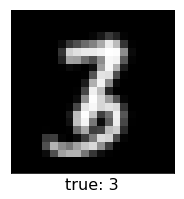

In [75]:
def view_digit(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(21,21), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)
        
training_index = 2
label_dict = dict({0:3, 1:7, 2:8, 3:9})
view_digit(X_train[training_index], label_dict[np.argmax(y_train[training_index])])
print(X_train.shape)

**Part B**: Train a network with a single hidden layer containing $30$ neurons on the first $500$ training examples in the training set using a learning rate of $\eta = 0.01$ for at least $50$ epochs.  What accuracy does your network achieve on the validation set?  Do you see any clear signs of overfitting?   

In [83]:
sizes = [441,30,4]
net = Network(sizes)
net.train(X_train,y_train = y_train,X_valid = X_valid,y_valid=y_valid,eta = 0.01, num_epochs = 50)

epoch   1/ 50:   train acc:    0.546  valid acc:    0.561
epoch  11/ 50:   train acc:    0.878  valid acc:    0.874
epoch  21/ 50:   train acc:    0.911  valid acc:    0.904
epoch  31/ 50:   train acc:    0.925  valid acc:    0.920
epoch  41/ 50:   train acc:    0.938  valid acc:    0.925
epoch  50/ 50:   train acc:    0.943  valid acc:    0.924


No there is no clear sign of overfitting. The validation and training accuracy are nearly identical and increase together at the same rate. The final validation accuracy is 92%

**Part C**: Modify the `Network` class so that it stores the accuracies on the training and validation data every $5$ epochs during the training process. Now increase the number of neurons in the hidden layer to $100$.  On a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the learning rates $\eta = 0.01$, $\eta = 0.25$ and $\eta = 1.5$.  Which learning rate seems to perform the best? What is the best accuracy achieved on the validation set?   

In [85]:
sizes = [441,100,4]
etas = [0.01,0.25,1.5]
trainAcc = []
validAcc = []
epochNum = [1,6,11,16,21,26,31,36,41,46,50]
for eta in etas:
    net = Network(sizes)
    net.train(X_train,y_train = y_train,X_valid = X_valid,y_valid=y_valid,eta = eta,num_epochs = 50)
    trainAcc.append(net.trainAcc)
    validAcc.append(net.validAcc)

epoch   1/ 50:   train acc:    0.522  valid acc:    0.513
epoch   6/ 50:   train acc:    0.678  valid acc:    0.695
epoch  11/ 50:   train acc:    0.695  valid acc:    0.701
epoch  16/ 50:   train acc:    0.713  valid acc:    0.712
epoch  21/ 50:   train acc:    0.905  valid acc:    0.892
epoch  26/ 50:   train acc:    0.928  valid acc:    0.912
epoch  31/ 50:   train acc:    0.940  valid acc:    0.921
epoch  36/ 50:   train acc:    0.946  valid acc:    0.922
epoch  41/ 50:   train acc:    0.950  valid acc:    0.925
epoch  46/ 50:   train acc:    0.954  valid acc:    0.926
epoch  50/ 50:   train acc:    0.957  valid acc:    0.929
epoch   1/ 50:   train acc:    0.707  valid acc:    0.709
epoch   6/ 50:   train acc:    0.729  valid acc:    0.727
epoch  11/ 50:   train acc:    0.737  valid acc:    0.727
epoch  16/ 50:   train acc:    0.740  valid acc:    0.730
epoch  21/ 50:   train acc:    0.741  valid acc:    0.730
epoch  26/ 50:   train acc:    0.741  valid acc:    0.729
epoch  31/ 50:

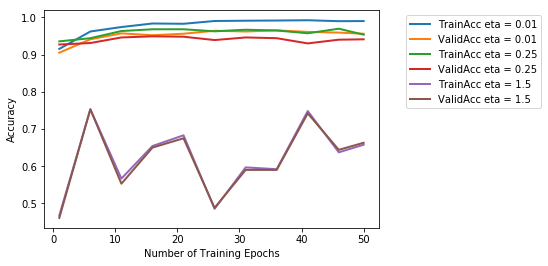

In [88]:
for i,eta in enumerate(etas):
    train_label = 'TrainAcc eta = {}'.format(eta)
    valid_label = 'ValidAcc eta = {}'.format(eta)
    plt.plot(epochNum,trainAcc[i],lw = 2,label = train_label)
    plt.plot(epochNum,validAcc[i],lw = 2,label = valid_label)
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Epochs')
plt.legend(loc = 'upper right',bbox_to_anchor = [1.5,1])
plt.show()

As we can see, the learning rate $\eta = 1.5$ seems to work the best with an accuracy of 97% on the validation set.

**Part D**:  Now let's see if we can get better results with regularization. Using the best learning rate you found in **Part C**, on a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the regularization strengths $\lambda = 10^{-6}$, $\lambda = 10^{-4}$ and $\lambda = 10^{-2}$.  Which regularization strength seems to perform the best? What is the best accuracy achieved on the validation set?   

In [87]:
sizes = [441,100,4]
lams = [1.0*10**-6,1.0*10**-4,1.0*10**-2]
trainAcc = []
validAcc = []
epochNum = [1,6,11,16,21,26,31,36,41,46,50]
for lam in lams:
    net = Network(sizes)
    net.train(X_train,y_train = y_train,X_valid = X_valid,y_valid=y_valid,eta = 1.5,lam = lam,num_epochs = 50)
    trainAcc.append(net.trainAcc)
    validAcc.append(net.validAcc)

epoch   1/ 50:   train acc:    0.915  valid acc:    0.905
epoch   6/ 50:   train acc:    0.962  valid acc:    0.941
epoch  11/ 50:   train acc:    0.974  valid acc:    0.957
epoch  16/ 50:   train acc:    0.984  valid acc:    0.952
epoch  21/ 50:   train acc:    0.983  valid acc:    0.956
epoch  26/ 50:   train acc:    0.990  valid acc:    0.964
epoch  31/ 50:   train acc:    0.991  valid acc:    0.962
epoch  36/ 50:   train acc:    0.992  valid acc:    0.965
epoch  41/ 50:   train acc:    0.992  valid acc:    0.961
epoch  46/ 50:   train acc:    0.990  valid acc:    0.959
epoch  50/ 50:   train acc:    0.990  valid acc:    0.956
epoch   1/ 50:   train acc:    0.935  valid acc:    0.927
epoch   6/ 50:   train acc:    0.944  valid acc:    0.931
epoch  11/ 50:   train acc:    0.963  valid acc:    0.946
epoch  16/ 50:   train acc:    0.968  valid acc:    0.949
epoch  21/ 50:   train acc:    0.968  valid acc:    0.948
epoch  26/ 50:   train acc:    0.963  valid acc:    0.939
epoch  31/ 50:

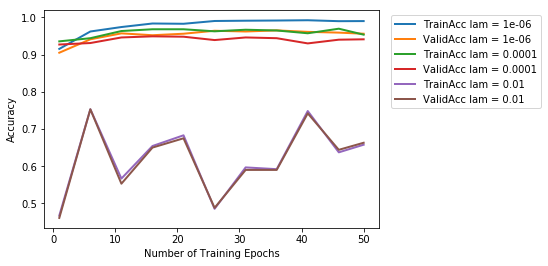

In [89]:
for i,lam in enumerate(lams):
    train_label = 'TrainAcc lam = {}'.format(lam)
    valid_label = 'ValidAcc lam = {}'.format(lam)
    plt.plot(epochNum,trainAcc[i],lw = 2,label = train_label)
    plt.plot(epochNum,validAcc[i],lw = 2,label = valid_label)
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Epochs')
plt.legend(loc = 'upper right',bbox_to_anchor = [1.5,1])
plt.show()

Clearly, the best lambda is the low lambda of $\lambda = 10^{-6}$ because there was no overfitting to begin with really, so only a very small regularization is needed. The final validation accuracy is 95% which is worse than without regularization.

**Part E**:  Now let's see if we can get better results with different network architectures. On a single set of axes, plot the **validation accuracy** vs epoch for networks trained on the full training set for at least 50 epochs using the architecture from **Part D** as well as two other architectures.  Which architecture seems to perform the best? What is the best accuracy achieved on the validation set?   

In [90]:
sizes = [[441,50,4],[441,100,4],[441,100,30,4]]
trainAcc = []
validAcc = []
epochNum = [1,6,11,16,21,26,31,36,41,46,50]
for size in sizes:
    net = Network(size)
    net.train(X_train,y_train = y_train,X_valid = X_valid,y_valid=y_valid,eta = 1.5,lam = 10**-6,num_epochs = 50)
    trainAcc.append(net.trainAcc)
    validAcc.append(net.validAcc)

epoch   1/ 50:   train acc:    0.933  valid acc:    0.923
epoch   6/ 50:   train acc:    0.935  valid acc:    0.924
epoch  11/ 50:   train acc:    0.975  valid acc:    0.951
epoch  16/ 50:   train acc:    0.979  valid acc:    0.950
epoch  21/ 50:   train acc:    0.982  valid acc:    0.948
epoch  26/ 50:   train acc:    0.989  valid acc:    0.959
epoch  31/ 50:   train acc:    0.988  valid acc:    0.958
epoch  36/ 50:   train acc:    0.990  valid acc:    0.956
epoch  41/ 50:   train acc:    0.991  valid acc:    0.955
epoch  46/ 50:   train acc:    0.993  valid acc:    0.961
epoch  50/ 50:   train acc:    0.987  valid acc:    0.957
epoch   1/ 50:   train acc:    0.909  valid acc:    0.897
epoch   6/ 50:   train acc:    0.965  valid acc:    0.949
epoch  11/ 50:   train acc:    0.975  valid acc:    0.955
epoch  16/ 50:   train acc:    0.985  valid acc:    0.956
epoch  21/ 50:   train acc:    0.981  valid acc:    0.959
epoch  26/ 50:   train acc:    0.981  valid acc:    0.947
epoch  31/ 50:

It seems like a network with 100 nodes in a single layer performs the best with a validation accuracy 97%. 

### [max 10 points] Extra Credit: Improving Network Performance 
***

See if you can get better performance by exploring advanced techniques.  Things you might try are: 

- Implementing **Mini-Batch** Stochastic Gradient Descent 
- Experimenting with different activation functions (like tanh and ReLU)
- Experimenting with different loss functions (like cross-entropy or softmax) 

For more detailed discussion of these techniques it'll be helpful to look at Chapter 3 of [Nielsen](http://neuralnetworksanddeeplearning.com/chap3.html). 

To receive the extra credit you should try at least a couple of the above and clearly describe what worked and what did not.  

**Important Note**: Don't do any of these things in the original `Network` class, because you'll almost certainly break the unit tests.  Copy the `Network` class from above and rename it `BetterNetwork` (or something) and modify the new class. 
